# Explore here

In [42]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



    age. Edad del beneficiario principal (numérico)
    sex. Género del beneficiario principal (categórico)
    bmi. índice de masa corporal (numérico)
    children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
    smoker. ¿Es fumador? (categórico)
    region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
    charges. Prima del seguro médico (numérico)


In [43]:
df.to_csv('../data/raw/df.csv')

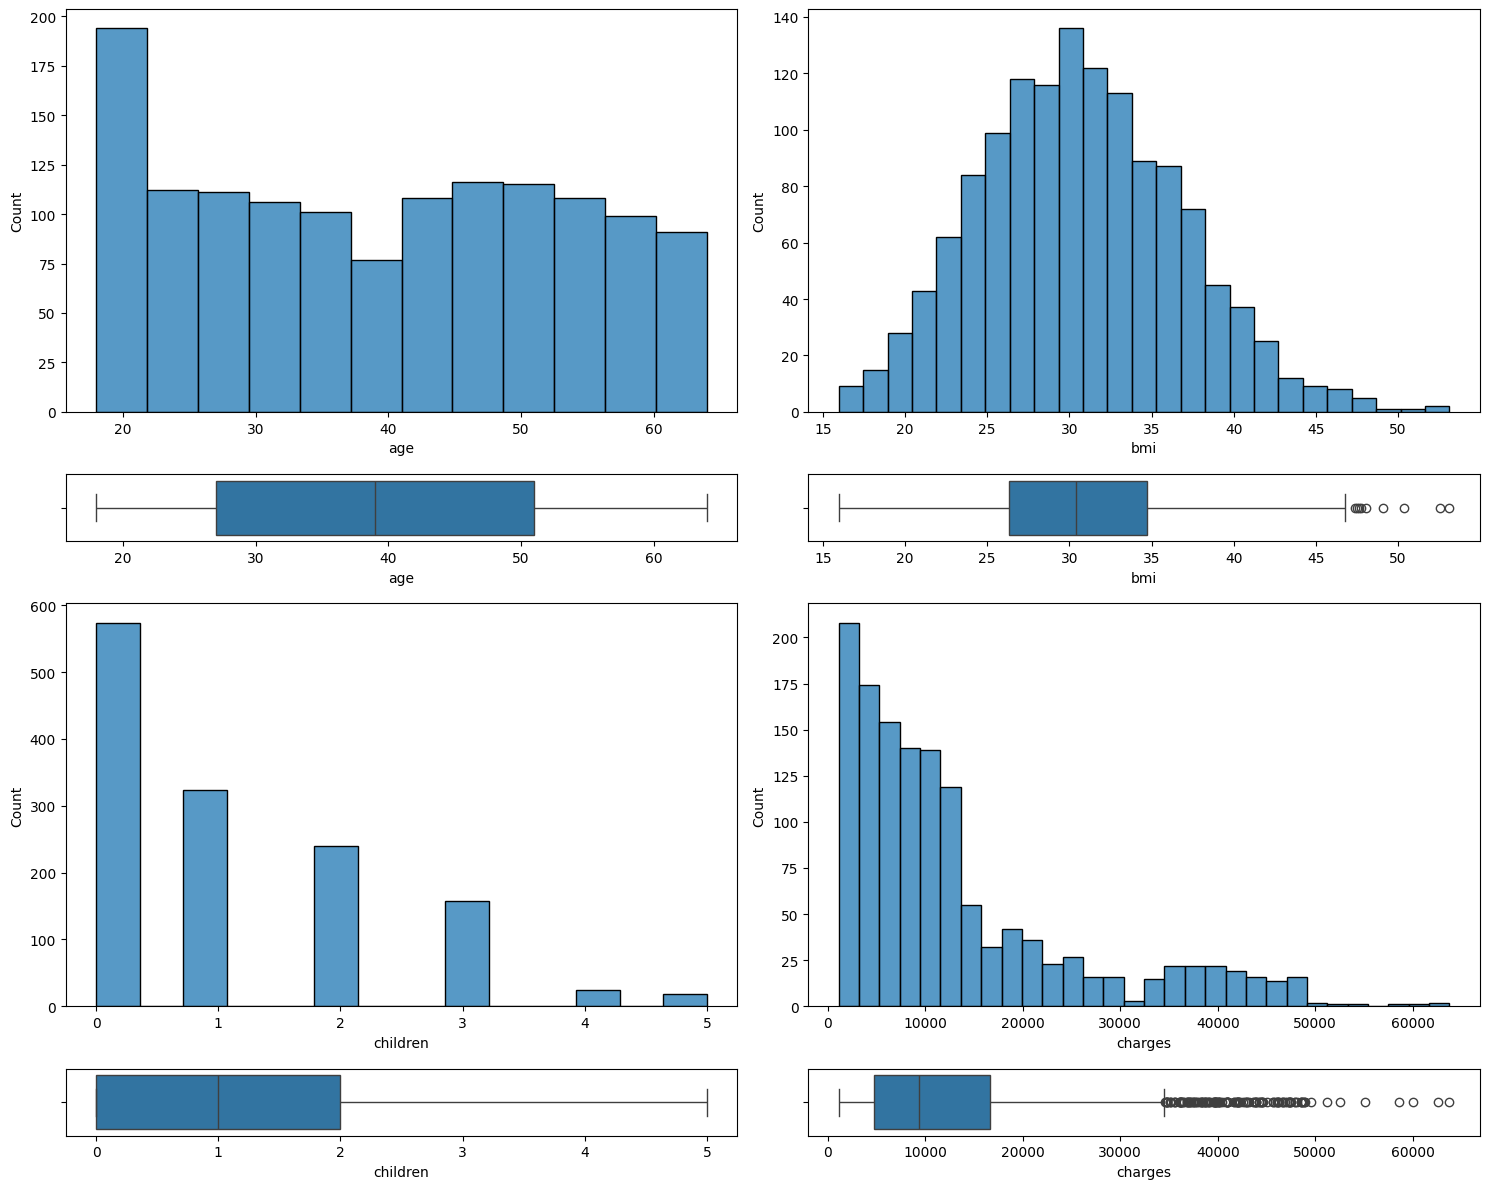

In [44]:
fig, axis = plt.subplots(4, 2, figsize = (15, 12), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")

sns.histplot(ax = axis[2, 0], data = df, x = "children")
sns.boxplot(ax = axis[3, 0], data = df, x = "children")

sns.histplot(ax = axis[2, 1], data = df, x = "charges")
sns.boxplot(ax = axis[3, 1], data = df, x = "charges")

plt.tight_layout()

plt.show()

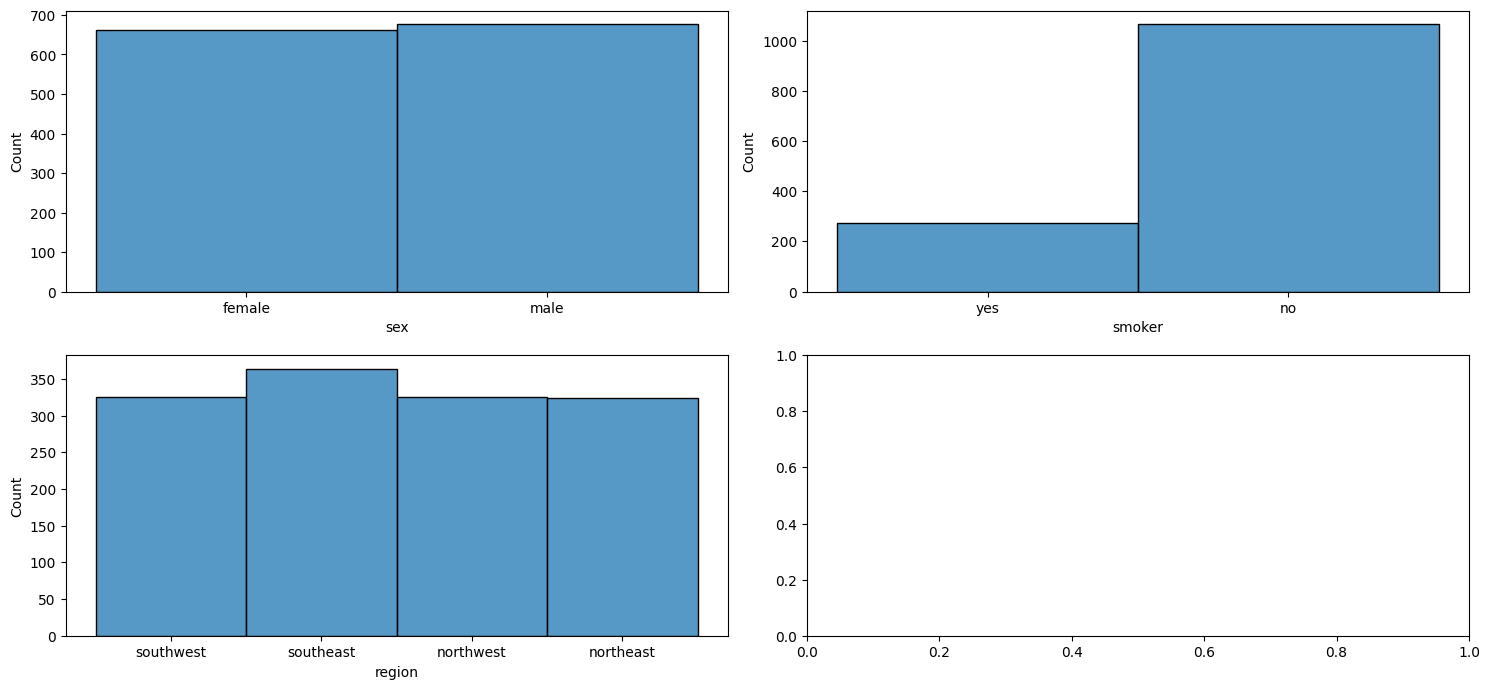

In [45]:
#Analizo valores categoricos
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "sex")
sns.histplot(ax = axis[0, 1], data = df, x = "smoker")
sns.histplot(ax = axis[1, 0], data = df, x = "region")



plt.tight_layout()

plt.show()


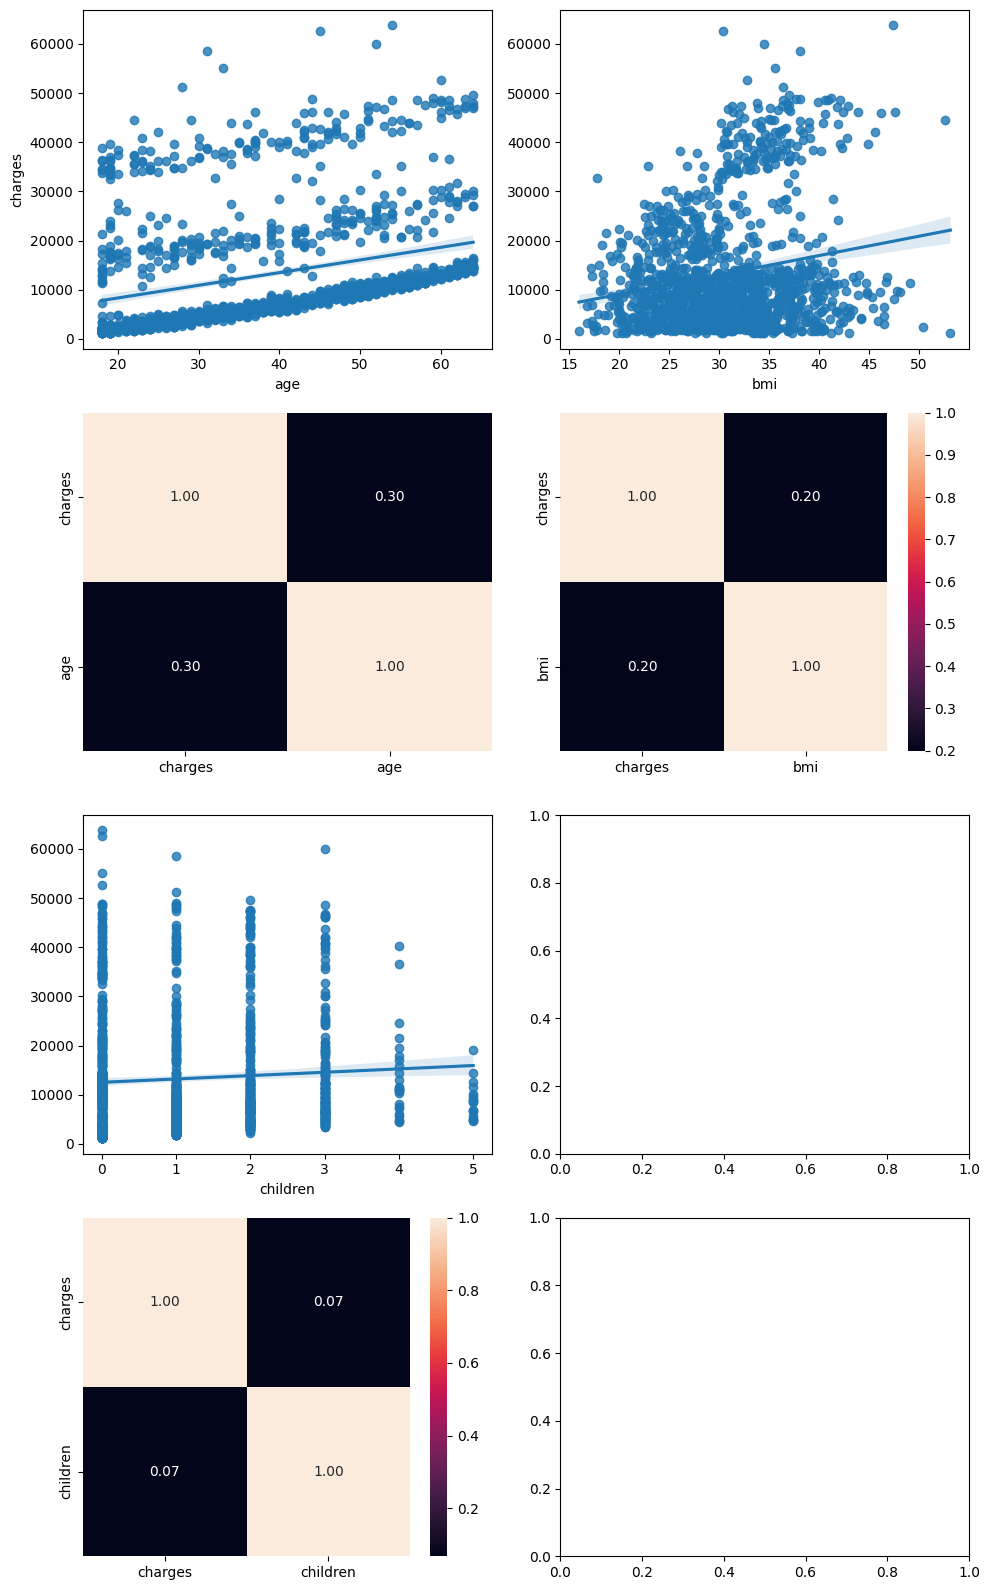

In [46]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges").set(ylabel = None)
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "children", y = "charges").set(ylabel = None)
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

plt.tight_layout()
plt.show()


In [47]:
#Factorizo datos categoricos

df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

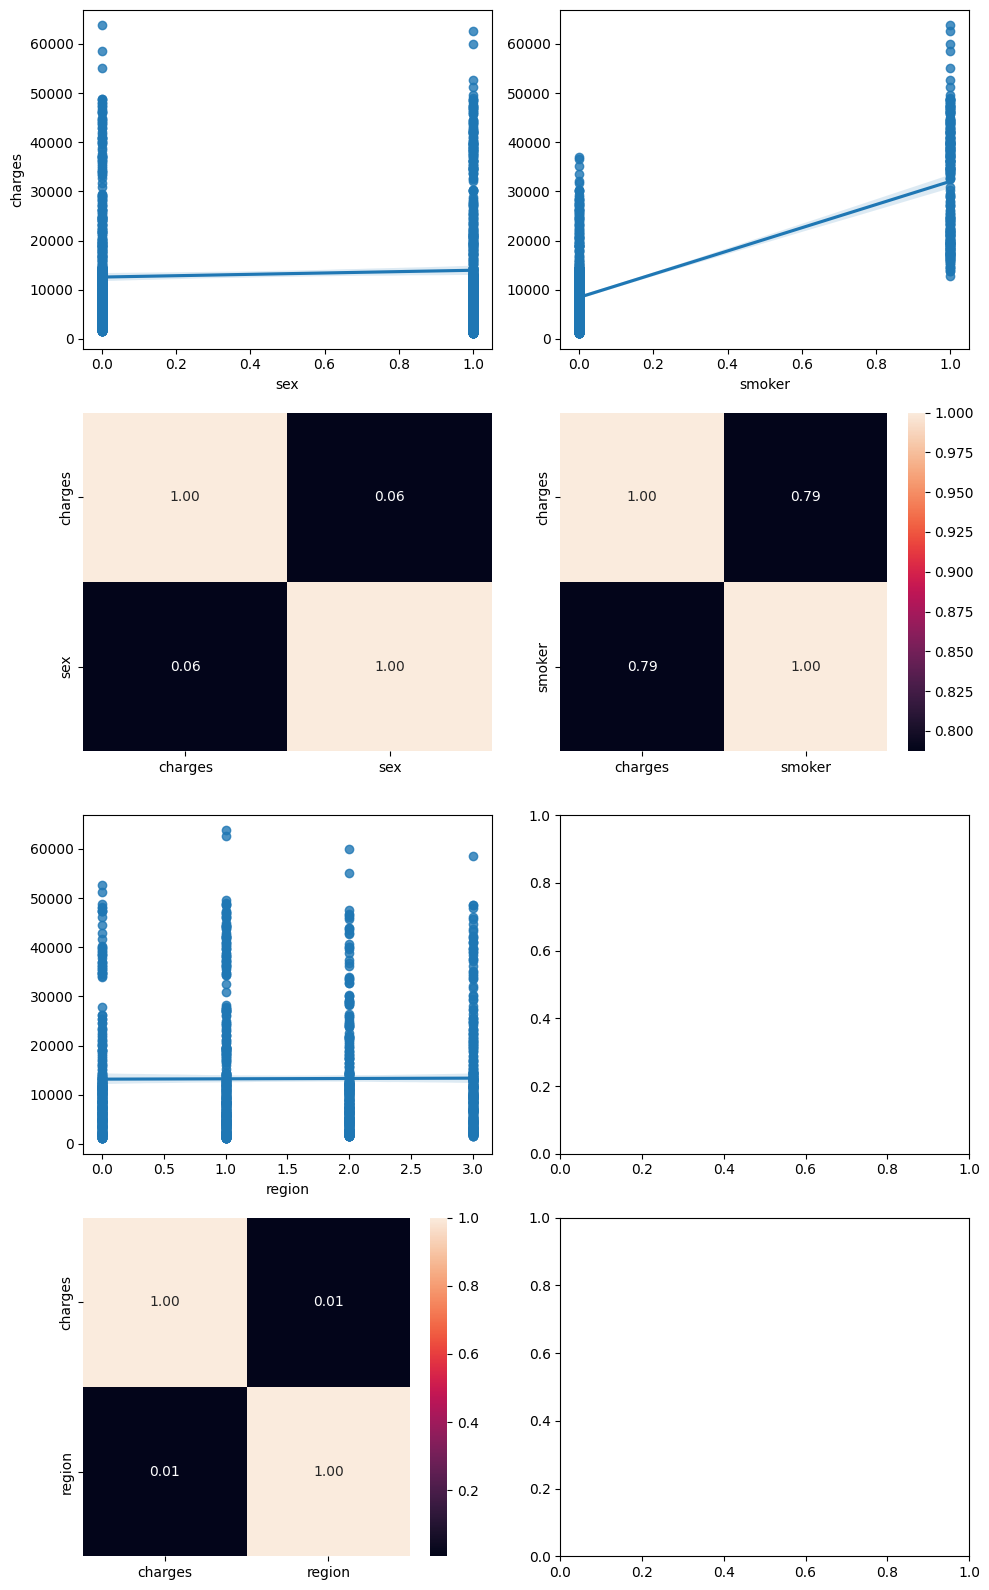

In [48]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = df, x = "sex", y = "charges")
sns.heatmap(df[["charges", "sex"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "smoker", y = "charges").set(ylabel = None)
sns.heatmap(df[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "region", y = "charges").set(ylabel = None)
sns.heatmap(df[["charges", "region"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

plt.tight_layout()
plt.show()

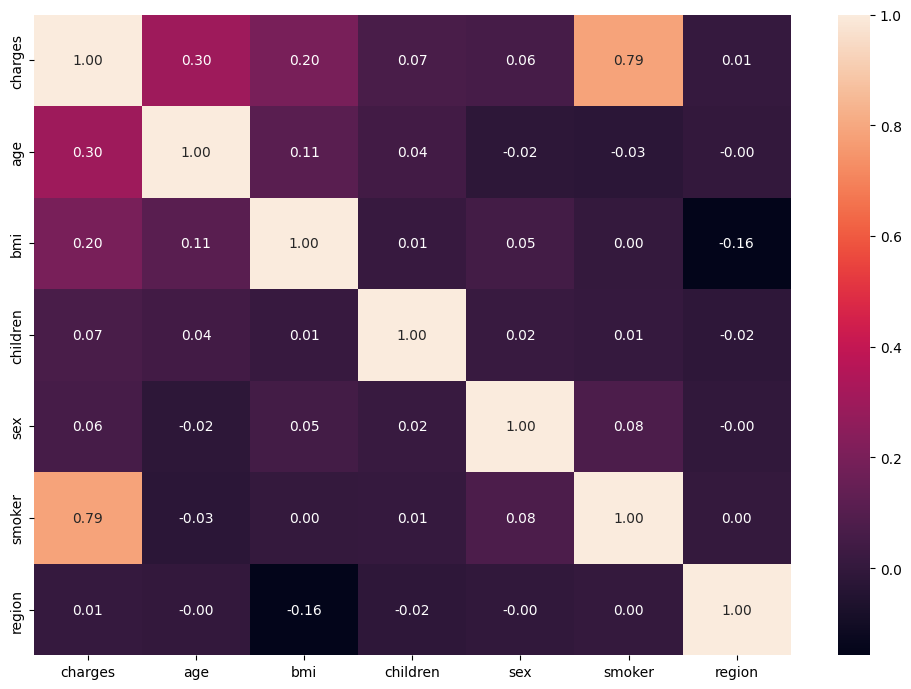

In [49]:
fig, axes = plt.subplots(figsize=(10, 7))

sns.heatmap(df[["charges", "age", "bmi", "children", "sex", "smoker", "region"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

La correlacion mas fuerte es la de smoker, seguido por age y bmi

In [50]:
df.drop(["children","sex","region"], axis = 1, inplace = True)

In [51]:
df.describe()

,age,bmi,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,0.204783,13270.422265
std,14.049960,6.098187,0.403694,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,0.000000,9382.033000
75%,51.000000,34.693750,0.000000,16639.912515
max,64.000000,53.130000,1.000000,63770.428010


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df)
df_scal = pd.DataFrame(scal_features, index = df.index, columns = df.columns)
df_scal.head()

,age,bmi,smoker,charges
0,0.021739,0.321227,1.0,0.251611
1,0.000000,0.479150,0.0,0.009636
2,0.217391,0.458434,0.0,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816


In [53]:

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = df_scal.drop("charges", axis = 1)
y = df_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

/home/leo/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=4 is greater than n_features=3. All the features will be returned.
  warnings.warn(


,age,bmi,smoker
0,0.608696,0.107345,0.0
1,0.630435,0.224913,0.0
2,0.739130,0.239440,0.0
3,0.456522,0.493947,0.0
4,0.782609,0.148238,0.0


In [54]:
X_test_sel.head()

,age,bmi,smoker
0,0.586957,0.247915,0.0
1,0.391304,0.378262,0.0
2,1.000000,0.293920,1.0
3,0.608696,0.263250,0.0
4,0.021739,0.429379,1.0


In [55]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [56]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,smoker,charges
0,0.608696,0.107345,0.0,0.128845
1,0.630435,0.224913,0.0,0.118324
2,0.739130,0.239440,0.0,0.414952
3,0.456522,0.493947,0.0,0.119316
4,0.782609,0.148238,0.0,0.181225


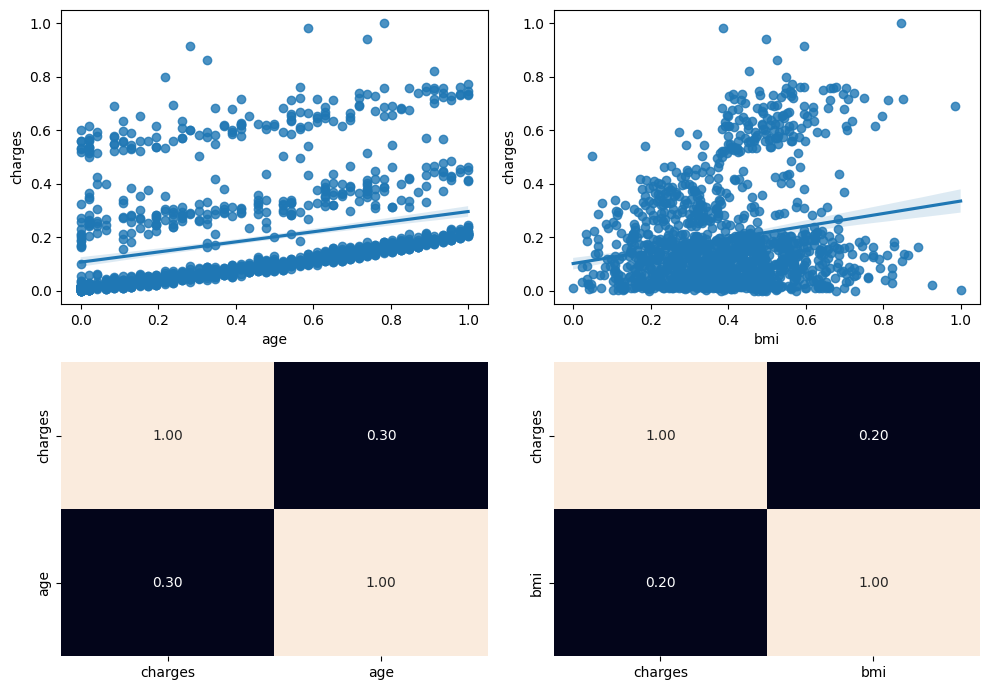

In [60]:

fig, axis = plt.subplots(2, 2, figsize = (10, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0,0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)

plt.tight_layout()

plt.show()

In [61]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): -0.047090421927814624
Coefficients (b1, b2): [0.19047318 0.19368612 0.37790771]


In [64]:
y_pred = model.predict(X_test)
y_pred

array([ 0.11272674,  0.10070667,  0.57821866,  0.11983763,  0.41812267,
        0.15954056, -0.00879279,  0.25773417,  0.00124718,  0.14760566,
        0.42448525,  0.12438044,  0.06948097,  0.58427098,  0.63478961,
        0.57064281,  0.220505  ,  0.55860582,  0.13184857,  0.49126352,
        0.02326852,  0.14313563,  0.03229452,  0.09372443,  0.14877621,
        0.18910043,  0.22655494,  0.06542029,  0.1284336 ,  0.02679898,
        0.11351776,  0.19706734,  0.06386832,  0.0233894 ,  0.05919524,
        0.18896102,  0.01973269,  0.12906642,  0.5141742 ,  0.50560642,
        0.02291504,  0.04966696,  0.21363962,  0.17218193,  0.11814249,
        0.182812  ,  0.0574069 ,  0.02535285,  0.5386038 ,  0.12361761,
        0.24523008,  0.02278665,  0.17667288,  0.00587755,  0.2065008 ,
        0.16956738,  0.05210101,  0.48068205,  0.20785186,  0.18792987,
        0.2217814 ,  0.14412406,  0.23590648,  0.09931453,  0.17141346,
        0.0462947 ,  0.39399283,  0.14809505,  0.01605154,  0.09

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.008793436717604542
R2 Score: 0.7776932310583375
